<a href="https://colab.research.google.com/github/Zolinad/Topic_Redes_Neurais/blob/main/C%C3%B3pia_Atividade3_Redes_Neurais_MODELO_%5BIRIS%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table>

<tr>
</tr>
<tr>
<td>

<a href="https://ibb.co/yV6MFF4"><img src="https://i.ibb.co/yV6MFF4/Ufopa-braso-PNG-fundo-transparente-reduzida.png" alt="Ufopa-braso-PNG-fundo-transparente-reduzida" border="0"></a>

</td>


<td>

|**UFOPA**|
------------------------------------------|
| *Campus de Oriximiná* |
| *SISTEMAS DE INFORMAÇÃO* |
| Docente: Esp. Danilo Azevedo Figueiredo |
| Disciplina: **REDES NEURAIS** |
|**Atividade**: Modelo RNA com Cross Validation para Classificação, usando o dataset IRIS|

</td>
</tr>

</table>


### Aluno: ???
### Data de entrega: 28/04/2024, até 23:59h.


# **Modelo de Rede Neural para Classificação de Espécies da Flor IRIS (dataset: IRIS)**
---
O Iris dataset é um conjunto de dados bem conhecido na comunidade academica, esse conjunto de dados consiste em 50 amostras de cada uma das três espécies (150 amostras, no total) de Iris: *Iris setosa, Iris virginica e Iris versicolor*.

Quatro variáveis foram medidas em cada amostra: o comprimento (*length*) e a largura (*width*) das sépalas (*Sepal*) e pétalas (*Petal*), em centímetros. Com base na combinação dessas quatro características, é possível distinguir as espécies umas das outras.

Abaixo a representação dos três tipos de flores Iris.

![](https://www.embedded-robotics.com/wp-content/uploads/2022/01/Iris-Dataset-Classification.png)

---
# **1 - IMPORTAR TODAS AS BIBLIOTECAS**
---

### *Instalar o <font color='gree'>"keras"</font> e o <font color='gree'>"scikeras"*</font>

In [1]:
import importlib
# Define uma função para instalar um pacote se não estiver instalado.
def instalar_se_nao_instalado(pacote):
    try:
        importlib.import_module(pacote)
    except ImportError:
        print(f"{pacote} não está instalado. Instalando...")
        !pip install {pacote}

# Verifica se o scikeras está instalado e, se não estiver, o instala
instalar_se_nao_instalado("keras")

# Verifica se o scikeras está instalado e, se não estiver, o instala
instalar_se_nao_instalado("scikeras")

scikeras não está instalado. Instalando...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 13.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


### *Bibliotecas*

In [2]:
# Importar as bibliotecas necessárias
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from scikeras.wrappers import KerasClassifier
from keras.callbacks import EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time

### *Funções auxiliares*

In [3]:
# Valores iniciais para os hiperparâmetros
camada_oculta = 8; camada_saida = 3 # neurônios nas camadas
Epocas = 6; Batch_Size = 36; K_Folds = 3 # hiperparâmetros







# Define uma função para lidar com a entrada do usuário para as camadas da rede neural.
def obter_valor(z):
    try:
        return int(input(f"Quantos neurônios na camada {z}? ") or '')
    except ValueError:
        if z == 'oculta': return camada_oculta
        else: return camada_saida






# Define uma função para lidar com a entrada do usuário para o hiperparâmetro
def obter_hiperparametro(z):
    try:
        return int(input(f"Qual a quantidade de {z}? ") or '')
    except ValueError:
        if z == 'epocas': return Epocas
        elif z == 'batch size': return Batch_Size
        else: return K_Folds






# Define uma função para plotar a matriz de confusão.
def funcao_plot_matriz_confusao(matriz_confusao, target_names):
    """
    Plota a matriz de confusão.

    Args:
    - matriz_confusao: Matriz de confusão a ser plotada.
    - target_names: Nomes das classes.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusao, annot=True, cmap='viridis', fmt='d')

    plt.title('Matriz de Confusão - Melhor Modelo', fontweight='bold')
    plt.xlabel('Rótulo predito', fontweight='bold')
    plt.ylabel('Rótulo Real', fontweight='bold')

    plt.xticks(ticks=np.arange(len(target_names)) + 0.5, labels=target_names)
    plt.yticks(ticks=np.arange(len(target_names)) + 0.5, labels=target_names)

    plt.show()






# Define uma função para carregar o dataset Iris.
def carregar_dataframe_iris():
    # Carregar o dataset Iris da biblioteca scikit-learn
    iris = load_iris()

    # Criar um DataFrame para os atributos (features)
    df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

    # Mapear os valores numéricos da variável alvo para os nomes das espécies
    nome_especies = dict(enumerate(iris.target_names))

    # Criar uma coluna 'species' contendo os nomes das espécies
    df_iris['especies'] = pd.Series(iris.target).map(nome_especies)

    # Embaralhar as linhas do DataFrame (para exibir as linhas aleatoriamente)
    df_iris_shuffled = shuffle(df_iris, random_state=SEED)

    return df_iris_shuffled






# Define uma função para obter o número de previsões corretas por classe.
def predicao_correta_por_classe(matriz_confusao, nomes_classes):
  # Extrair o número de previsões corretas para cada classe
  predicao_correta_por_classe = {}
  for i in range(matriz_confusao.shape[0]):
      nome_classe = nomes_classes[i]  # Obter o nome da classe correspondente
      predicao_correta_por_classe[nome_classe] = matriz_confusao[i, i]

  return predicao_correta_por_classe



DEFININDO UMA SEED:
---
A Seed (semente) é uma função, das bibliotecas numpy e tensorflow, de randomização, que, garante que o modelo treinado com os mesmos parâmetros gere sempre os mesmos resultados.

In [4]:
SEED = 42
tf.random.set_seed(SEED)

---
# **2 - IMPORTAR O DATASET E CONSTRUIR UM DATAFRAME**
---

In [5]:
df_iris = carregar_dataframe_iris()
df_iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especies
73,6.1,2.8,4.7,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa
118,7.7,2.6,6.9,2.3,virginica
78,6.0,2.9,4.5,1.5,versicolor
76,6.8,2.8,4.8,1.4,versicolor
31,5.4,3.4,1.5,0.4,setosa
64,5.6,2.9,3.6,1.3,versicolor
141,6.9,3.1,5.1,2.3,virginica
68,6.2,2.2,4.5,1.5,versicolor
82,5.8,2.7,3.9,1.2,versicolor


DIMENSÃO DO DATASET (linhas e colunas)
---

In [6]:
print(f'Quantidade de linhas:{df_iris.shape[0]}\
      \nQuantidade de colunas: {df_iris.shape[1]}')

Quantidade de linhas:150      
Quantidade de colunas: 5


---
# **3 - SEPARAR O DATASET EM FEATURES (X) E LABELS (y)**
---
Vamos selecionar as features (colunas relevantes para o modelo, da 0 até a 4) e definir **X** como o dataframe que contém tanto o conjunto de dados de **treinamento** quanto o conjunto de dados de **teste** (que será dividido posteriormente na Validação Cruzada). E **y** como a variável target (ou como o conjunto de dados de **classes**).

In [7]:
df_X = df_iris.iloc[:, 0:4] # iloc para selecionar linhas (registros) e colunas (features)
df_X.head(10) # mostra as colunas (features) selecionadas

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


**Features X** (as colunas de atributos que são a base para o treinamento do modelo de classificação)

In [8]:
X = df_X.values # .values converte para o formato ARRAY numpy (obs.: títulos das colunas se tornam índices numéricos)
pd.DataFrame(X).head(10)

,0,1,2,3
0,6.1,2.8,4.7,1.2
1,5.7,3.8,1.7,0.3
2,7.7,2.6,6.9,2.3
3,6.0,2.9,4.5,1.5
4,6.8,2.8,4.8,1.4
5,5.4,3.4,1.5,0.4
6,5.6,2.9,3.6,1.3
7,6.9,3.1,5.1,2.3
8,6.2,2.2,4.5,1.5
9,5.8,2.7,3.9,1.2


In [9]:
X_entradas = X.shape[1] # Quantidade de elementos na camada de entrada. -> X.shape[] retorna a dimensão, [0] para linhas, [1] para colunas.
print(f"Elementos na camada de entrada: {X_entradas}")

Elementos na camada de entrada: 4


**Variável Target y** (a coluna que contém as labels = classes)
*   Definindo o vetor (uma coluna apenas) para as classes (labels).
*  A coluna y vai mostrar três classes (espécies):
 * classe 0 para SETOSA;
 * classe 1 para VERSICOLOR
 * classe 2 para VIRGINICA

In [10]:
df_y = df_iris.iloc[:, 4] # seleciona apenas a coluna 4 (especies)
y = df_y.values # y = saída, vetor coluna no formato ARRAY numpy
y[:10] # array com 10 valores de exemplo da coluna y

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [11]:
y_classes = df_y.nunique() # verifica o número de classes únicas, neste caso 3 classes: (Setosa, Versicolor, Virginica)
print("Número de classes:", y_classes)

Número de classes: 3


---
# **4 - NORMALIZAÇÃO DAS FEATURES**
---

* As features ( features = colunas = atributos = número de entradas na rede neural ) são **NORMALIZADAS** usando a padronização com o StandardScaler(), que é uma operação de pré-processamento para deixar os valores numéricos dentro da mesma magnitude, geralmente dentro do intervalo decimal contínuo entre 0 a 1, mas também pode gerar valores tanto negativos quanto positivos (por exemplo, entre -3 e 3), dependendo do contexto e do método.
* A normalização é importante para equilibrar os pesos do modelo, o que ajuda a melhorar a capacidade de aprendizagem e a diminuir tempo de convergência para um resultado de predição.

In [12]:
# Normalizar as features
normalizacao = StandardScaler()
X_norm = normalizacao.fit_transform(X)

EXIBIR O DATAFRAME NORMALIZADO
---
A normalização busca uma média igual a zero, então podem haver valores resultantes positivos e negativos.

In [13]:
df_X_norm = pd.DataFrame(X_norm)
df_X_norm

,0,1,2,3
0,0.310998,-0.592373,0.535409,0.000878
1,-0.173674,1.709595,-1.169714,-1.183812
2,2.249683,-1.052767,1.785832,1.448832
3,0.189830,-0.362176,0.421734,0.395774
4,1.159173,-0.592373,0.592246,0.264142
...,...,...,...,...
145,0.310998,-0.592373,0.137547,0.132510
146,-1.143017,-1.282963,0.421734,0.659038
147,-0.052506,2.169988,-1.453901,-1.315444
148,-0.052506,-1.052767,0.137547,0.000878


---
# **5 - CRIANDO O MODELO DE REDE NEURAL COM O KERAS**
---
* O *KERAS* é uma biblioteca de machine learning baseada no TensorFlow, que permite a construção de modelos de rede neural de forma simplificada (cada camada da rede neural é adicionada linha por linha).
* A função definida, com o nome ***criar_modelo( )***, constrói a arquitetura da rede neural (camadas, neurônios, inicialização de pesos, função de ativação, otimizador, função de perda e métricas).
* Defina a **quantidade de neurônios** na (camada oculta)


In [ ]:
# Chama a função para obter a quantidade de neurônios nas camadas
camada_oculta = obter_valor("oculta") # caso não seja informado, ficará definido como (8)
camada_saida = obter_valor("de saída") # camada de saída (neste caso) = quantidade de classes = (3)

In [ ]:
def criar_modelo():
    modelo = tf.keras.Sequential()
    modelo.add(tf.keras.layers.Input(shape=(X.shape[1],)))

    modelo.add(tf.keras.layers.Dense(units=camada_oculta, kernel_initializer='uniform', activation='relu'))
    modelo.add(tf.keras.layers.Dense(units=camada_saida, kernel_initializer='uniform', activation='softmax'))

    modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return modelo

MOSTRANDO O RESUMO DO MODELO (informações gerais)
---


In [ ]:
# Acessando o modelo Keras
resumo_keras = criar_modelo()
resumo_keras.summary()

---
# **6 - DEFININDO OS HIPERPARÂMETROS E O CRITÉRIO DE PARADA**
---
* Os Hyerparâmetros (como epochs, batch_size, FOLDS) são os parâmetros que são utilizados para o treinamento do modelo e devem ser definidos pelo cientista de dados (você).
* Obs.: a quantidade de camadas ocultas e a quantidade de neurônios nelas também são considerados Hiperparâmetros.

In [ ]:
Epocas = obter_hiperparametro("épocas") # caso não seja informado, ficará definido como (6)
Batch_Size = obter_hiperparametro("batch size") # caso não seja informado, ficará definido como (36)
K_Folds = obter_hiperparametro("k-folds") # caso não seja informado, ficará definido como (3)
espera_maninho = 3 #quer dizer que se o modelo não melhorar após N épocas, ele para o treinamento.

egua_para_ja = EarlyStopping(monitor='accuracy', patience=espera_maninho, restore_best_weights=True)

"ENVELOPANDO" (wrapping) O MODELO KERAS
---

* Abaixo, o modelo Keras é "envelopado" para ser usado pelo scikit-learn.
* Isso permite que possamos avaliar o modelo construído com o Keras usando as funcionalidades fornecidas pela biblioteca scikit-learn (como a validação cruzada), através da passagem do hiperparâmetros como epoch, batch size e etc.

In [ ]:
# Envelopar o modelo Keras para ser usado com o scikit-learn
meu_modelo = KerasClassifier(model=criar_modelo,
                             epochs=Epocas,
                             batch_size=Batch_Size,
                             verbose=1,
                             random_state=SEED)

"EMBARALHAMENTO" DO DATASET
---

* Criamos um objeto KFold para realizar o embaralhamento dos dados do dataset através do parâmetro shuffle=True.
* Para datasets desbalanceados (classes muito desiguais) o mais recomendado é o StratifiedKFold.

In [ ]:
kf = KFold(n_splits=K_Folds, shuffle=True, random_state=SEED)

---
# **7 - VALIDAÇÃO CRUZADA ( K-FOLD CROSS VALIDATION )**
---
* Aqui é realizada a validação cruzada para avaliar o desempenho do modelo enquanto ele é treinado.
* Usando a validação cruzada, não é necessário dividir o dataset em dados de treino e dados de teste, de forma manual antes de criar o modelo. O algoritmo divide automaticamente os dados em "folds" (ou blocos).
* O algoritmo divide o dataset (conjunto de dados) em k Folds (k é a quantidade de folds). Ele repete isso k vezes (k é o número de vezes), criando "k-1" conjuntos de treinamento e "1" conjunto de teste, em cada vez. Assim, o modelo será treinado "k" vezes, o que garante uma maior eficácia em suas predições, pois terá passado por todos os dados do conjunto e não em apenas uma pequena amostra (nem sempre representativa).
* A validação cruzada (k-fold) é a técnica mais utilizada para melhorar a generalização de modelos de redes neurais, por garantir uma maior acurácia. Porém, o tempo de processamento será "k" vezes maior em relação a um modelo que não use a validação cruzada, já que, com essa técnica, a subdivisão do dataset em k folds gera "k" modelos diferentes, dos quais devemos usar aquele com maior acurácia. A acurácia, como métrica, se torna a média das acurácias de todos os "k" modelos.

In [ ]:
start_time = time.time()
cv_resultado = cross_validate(meu_modelo,
                              X_norm,
                              y,
                              cv=kf,
                              return_estimator=True,
                              scoring='accuracy',
                              params={'callbacks': egua_para_ja})
end_time = time.time()

### **TESTANDO O MODELO E ARMAZENANDO AS PREDIÇÕES**
Vamos encontrar o melhor dos 'k' modelos	treinados durante da validação cruzada (o que tiver maior acurácia).

In [ ]:
melhor_modelo_id = np.argmax(cv_resultado['test_score']) # indice do modelo com melhor acurácia
melhor_modelo = cv_resultado['estimator'][melhor_modelo_id] # modelo com melhor acurácia
acuracia = cv_resultado['test_score']
y_predito = melhor_modelo.predict(X_norm) # predição da saída y com o melhor modelo, usando o dataset inteiro e normalizado.
matriz_confusao = confusion_matrix(y, y_predito) # matriz de confusão armazanando os valores reais e as predições

---
# **8 - IMPRIMINDO OS RESULTADOS DE VALIDAÇÃO DO MODELO**
---
* Neste exemplo para predição de espécies da planta IRIS, a acurácia é a métrica utilizada para verificar o desempenho do modelo.
* A acurácia é calculada como a porcentagem de previsões corretas feitas pelo modelo, onde:

   **A**= <sup>**TOTAL DE ACERTOS**</sup>&frasl;<sub>**TOTAL DE PREVISÕES**

In [ ]:
# Imprimir os resultados de validação do modelo
print(f"Cross-validation TEMPO: {end_time - start_time} segundos")
print("ACURÁCIA em cada (k)-Fold:", cv_resultado['test_score'])
print("Acurácia Média:", np.mean(cv_resultado['test_score']))

### **PLOTANDO A MATRIZ DE CONFUSÃO PARA AVALIAR A PERFORMANCE DO MODELO**
Avaliando a performance do melhor dos 'k' modelos	treinados.

In [ ]:
# Mapear os índices das classes para os nomes das classes
nomes_classes = ['Setosa', 'Versicolor', 'Virginica']
funcao_plot_matriz_confusao(matriz_confusao, nomes_classes)

---
# **9 - HISTÓRICO DE AJUSTES NOS HIPERPARÂMETROS**
---

### Salvando os parâmetros escolhidos para cada modelo gerado.
* Cada vez que o código inteiro for executado, os parâmetros escolhidos para o modelo de rede neural serão salvos em um dataframe para fins de comparação entre todos os modelos gerados.

In [ ]:
# Verificando a quantidade de prediçoes corretas por classe
quant_acertos_por_classe = predicao_correta_por_classe(matriz_confusao, nomes_classes)

# Inicializar um DataFrame vazio para armazenar os resultados
if 'df_hist_ajustes' not in locals():
  df_hist_ajustes = pd.DataFrame(columns=['Neurônios na camada oculta', 'Épocas', 'Batch_Size', 'K_Folds', 'Acurácia', 'Quant. Acertos por Classe'])

nova_linha = pd.DataFrame({'Neurônios na camada oculta': [camada_oculta],
                           'Épocas': [Epocas],
                           'Batch_Size': [Batch_Size],
                           'K_Folds': [K_Folds],
                           'Acurácia': [np.mean(acuracia)],
                           'Quant. Acertos por Classe': [quant_acertos_por_classe]})

df_hist_ajustes = pd.concat([df_hist_ajustes, nova_linha], ignore_index=True)

### **Histórico de Ajustes nos Hiperparâmetros**

In [ ]:
df_hist_ajustes

---
---
---
---

# **AGORA RESPONDA AS QUESTÕES*
---

<table>

<tr>
</tr>
<tr>
<td>

<a href="https://ibb.co/yV6MFF4"><img src="https://i.ibb.co/yV6MFF4/Ufopa-braso-PNG-fundo-transparente-reduzida.png" alt="Ufopa-braso-PNG-fundo-transparente-reduzida" border="0"></a>

</td>


<td>

|**UFOPA**|
------------------------------------------|
| *Campus de Oriximiná* |
| *SISTEMAS DE INFORMAÇÃO* |
| Docente: Esp. Danilo Azevedo Figueiredo |
| Disciplina: **REDES NEURAIS** |
|**Atividade**: Modelo RNA com Cross Validation para Classificação, usando o dataset IRIS|

</td>
</tr>

</table>


Aluno: ???
---

---

**Instruções:**

Você deve rodar este código e fornecer os seguintes hiperparâmetros:
* número de neurônios na camada oculta;
* batch size
* número de épocas;
* quantidade k de Folds [k-fold, variando entre 3 e 10].

i) Já existem valores predefinidos para os quais o modelo foi treinado. Para verificar o desempenho do modelo com esses hiperparâmetros predefinidos, rode o código, e quando algum parâmetro for solicitado só aperte o ENTER.

`OBS.: sempre que você apertar ENTER sem inserir valores, o modelo será treinado com os valores predefinidos.`

ii) Após isso, o código deve ser executado novamente e os hiperparâmetros devem ser alterados para os valores desejados.

iii) Ao final do código, uma tabela será preenchida linha por linha com os valores que você escolheu para os hiperparâmetros e com o resultado do desempenho do modelo em cada exucução do código.

----

### 1.a) (1,0 pts)
Construa um modelo (simplesmente alterando os hiperparâmetros) que seja capaz de classificar corretamente cada flor Iris (Setosa, Versicolor e Virginica) de modo a obter a diagoonal principal da matriz de confusão com os valores {50, 50, 50}. Mostre os hiperparâmetros e o resultado do desempenho do modelo.

RESPOSTA:
* número de neurônios na camada oculta = ?
* batch size = ?
* número de épocas = ?
* quantidade k de Folds [k-fold] = ?
* acurácia = ?
* Predições corretas por classe = {setosa=50, versicolor=50, virginica=50} (neste caso!)


---

### 1.b) (1,0 pts)
Construa um modelo (simplesmente alterando os hiperparâmetros) que seja capaz de classificar corretamente cada flor Iris (Setosa, Versicolor e Virginica) com uma **acurácia** entre {0,85 e 0,9}. Mostre os hiperparâmetros e o resultado do desempenho do modelo.

RESPOSTA:
* número de neurônios na camada oculta = ?
* batch size = ?
* número de épocas = ?
* quantidade k de Folds [k-fold] = ?
* acurácia = entre {0,85 e 0,9} ->
* Predições corretas por classe = {setosa = ?, versicolor = ?, virginica = ?}

---


<font color="red">-----------------------------------------</font>
<font color="red">-----------------------------------------</font>
<font color="red">-----------------------------------------</font>

**Instruções:**

Ao finalizar a avaliação, clique em compartilhar, permita o acesso (como na imagem abaixo) e copie e envie o link deste colab para o SIGAA (no campo Atividade 3).

<font color="red">-----------------------------------------</font>
<font color="red">-----------------------------------------</font>
<font color="red">-----------------------------------------</font>

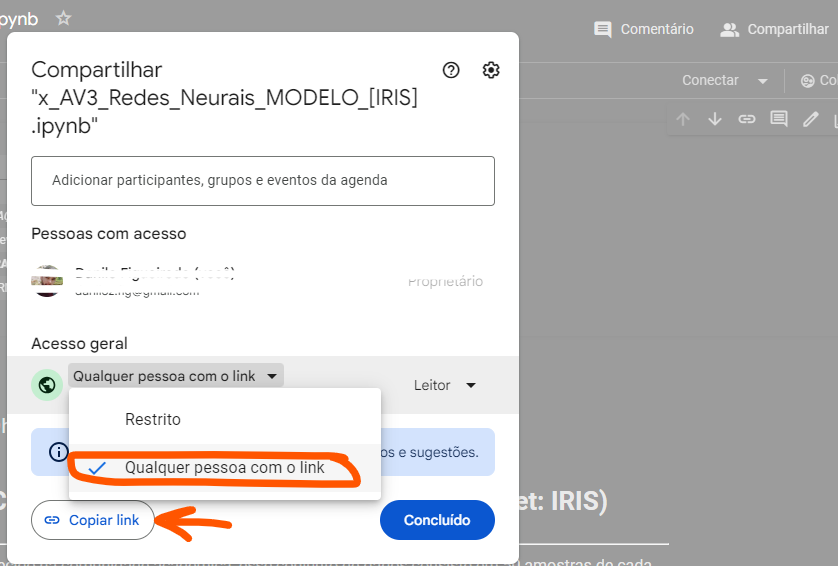